In [28]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
pd.set_option("display.max_colwidth", 200)
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [29]:
train_data=pd.read_csv("./train_E6oV3lV.csv")
test_data=pd.read_csv("./test_data.csv")


##### A look at raw data

In [30]:
combi_data = train_data.append(test_data,ignore_index=True)
combi_data.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation


##### To remove usernames in the tweets

In [31]:
def remove_input_pattern(pattern, input_string):
    y=re.findall(pattern,input_string)
    for i in y:
        input_string=re.sub(i,"",input_string)
    return input_string 

In [32]:
combi_data["cl_tweets"]=np.vectorize(remove_input_pattern)("@[\w]+",combi_data["tweet"])

In [33]:
combi_data.head()

,id,label,tweet,cl_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


##### To remove any other symbols and numbers

In [34]:
combi_data["cl_tweets"]=combi_data["cl_tweets"].str.replace("[^A-Za-z#]"," ")

In [35]:
combi_data.head(10)

,id,label,tweet,cl_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [37]:
tokenized_words=[]
stop_words=set(stopwords.words("english"))
for x in combi_data["cl_tweets"]:
    tokenized_words.append(word_tokenize(x))
filtered_sentence=[]
for x in tokenized_words:
    new_list=""
    for w in x:
        if w not in stop_words:
            new_list+=w+" "
    filtered_sentence.append(new_list)


In [38]:
combi_data["cl_tweets"]=filtered_sentence

In [39]:
combi_data.head(10)

,id,label,tweet,cl_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunctional selfish drags kids dysfunction # run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks # lyft credit use cause offer wheelchair vans pdx # disapointed # getthanked
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,# model love u take u time ur
4,5,0.0,factsguide: society now #motivation,factsguide society # motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare big talking leave chaos pay disputes get # allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exams think # school # exams # hate # imagine # actorslife # revolutionschool # girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land # allin # cavs # champions # cleveland # clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome # gr


###### Tokenizing the tweets

In [40]:
tokenized_tweets= combi_data['cl_tweets'].apply(lambda x: x.split())

In [41]:
tokenized_tweets.head()

0                                    [father, dysfunctional, selfish, drags, kids, dysfunction, #, run]
1    [thanks, #, lyft, credit, use, cause, offer, wheelchair, vans, pdx, #, disapointed, #, getthanked]
2                                                                                     [bihday, majesty]
3                                                                [#, model, love, u, take, u, time, ur]
4                                                                  [factsguide, society, #, motivation]
Name: cl_tweets, dtype: object

In [42]:
from nltk.stem.porter import *

In [43]:
stemmer=PorterStemmer()

In [44]:
tokenized_tweets=tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x])

In [45]:
tokenized_tweets.head()

0                                       [father, dysfunct, selfish, drag, kid, dysfunct, #, run]
1    [thank, #, lyft, credit, use, caus, offer, wheelchair, van, pdx, #, disapoint, #, getthank]
2                                                                              [bihday, majesti]
3                                                         [#, model, love, u, take, u, time, ur]
4                                                                 [factsguid, societi, #, motiv]
Name: cl_tweets, dtype: object

In [46]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i]=" ".join(tokenized_tweets[i])
combi_data['cl_tweets']=tokenized_tweets

In [47]:
combi_data.head(10)

,id,label,tweet,cl_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunct selfish drag kid dysfunct # run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank # lyft credit use caus offer wheelchair van pdx # disapoint # getthank
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,# model love u take u time ur
4,5,0.0,factsguide: society now #motivation,factsguid societi # motiv
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare big talk leav chao pay disput get # allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camp tomorrow danni
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exam think # school # exam # hate # imagin # actorslif # revolutionschool # girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land # allin # cav # champion # cleveland # clevelandcavali
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcom # gr


In [48]:
len(tokenized_tweets)

31967

#### Most Common Words in Non Racist/Sexist Tweets

In [49]:
all_non_words=" ".join(combi_data[combi_data['label']==0].cl_tweets)

In [50]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_non_words)

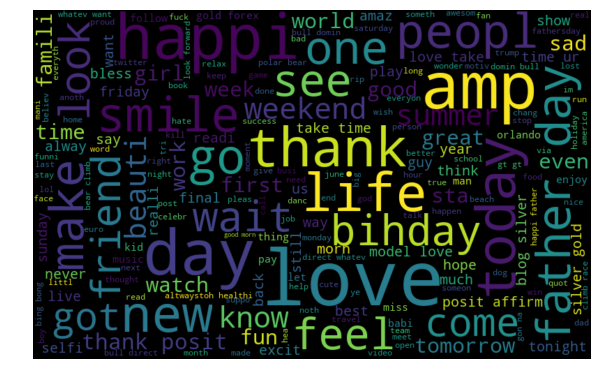

In [51]:
fig=plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

##### Most Common words in Racist/Sexist Tweets

In [52]:
all_racistwords=" ".join(combi_data[combi_data['label']==1].cl_tweets)

In [53]:
wrd_cld=WordCloud(height=500,width=800,random_state=21,max_font_size=110).generate(all_racistwords)

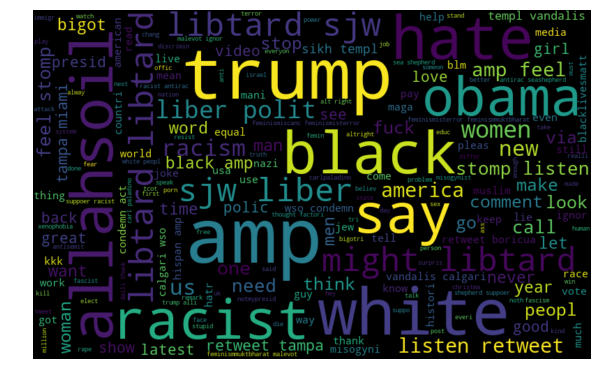

In [54]:
fig=plt.figure(figsize=(10,7))
plt.imshow(wrd_cld,interpolation="bilinear")
plt.axis("off")
plt.show()

##### Checking the impact of Hashtags

In [66]:
## 1) Non-Racist Tweets
non_hate=[]
for x in combi_data[combi_data["label"]==0].cl_tweets:
    all_hashtags=re.findall(r"#\s[\w]+",x)
    non_hate.append(all_hashtags)

In [67]:
non_hate[:7]

[['# run'],
 ['# lyft', '# disapoint', '# getthank'],
 [],
 ['# model'],
 ['# motiv'],
 ['# allshowandnogo'],
 []]

In [68]:
non_hate=sum(non_hate,[])

In [69]:
non_hate[:8]

['# run',
 '# lyft',
 '# disapoint',
 '# getthank',
 '# model',
 '# motiv',
 '# allshowandnogo',
 '# school']

In [70]:
## 2) Racist Tweets
racist=[]
for x in combi_data[combi_data["label"]==1].cl_tweets:
    all_hashtags=re.findall("#\s[\w]+",x)
    racist.append(all_hashtags)
racist=sum(racist,[])


In [71]:
racist[:6]

['# cnn',
 '# michigan',
 '# tcot',
 '# australia',
 '# opkillingbay',
 '# seashepherd']

In [72]:
a= nltk.FreqDist(non_hate)

In [73]:
df_non_hate=pd.DataFrame({"Hashtags":list(a.keys()),"Count":list(a.values())})

In [74]:
df_non_hate.head()

,Hashtags,Count
0,# run,75
1,# lyft,2
2,# disapoint,1
3,# getthank,2
4,# model,375


In [75]:
b= nltk.FreqDist(racist)
df_racist=pd.DataFrame({"Hashtags":list(b.keys()),"Count":list(b.values())})
df_racist.head(10)

,Hashtags,Count
0,# cnn,10
1,# michigan,2
2,# tcot,14
3,# australia,6
4,# opkillingbay,5
5,# seashepherd,22
6,# helpcovedolphin,3
7,# thecov,4
8,# neverump,8
9,# xenophobia,12


In [76]:
df_non_hate=df_non_hate.nlargest(columns="Count",n=20)
df_racist=df_racist.nlargest(columns="Count",n=20)

### Plotting the top 20 hashtags in non-racist tweets

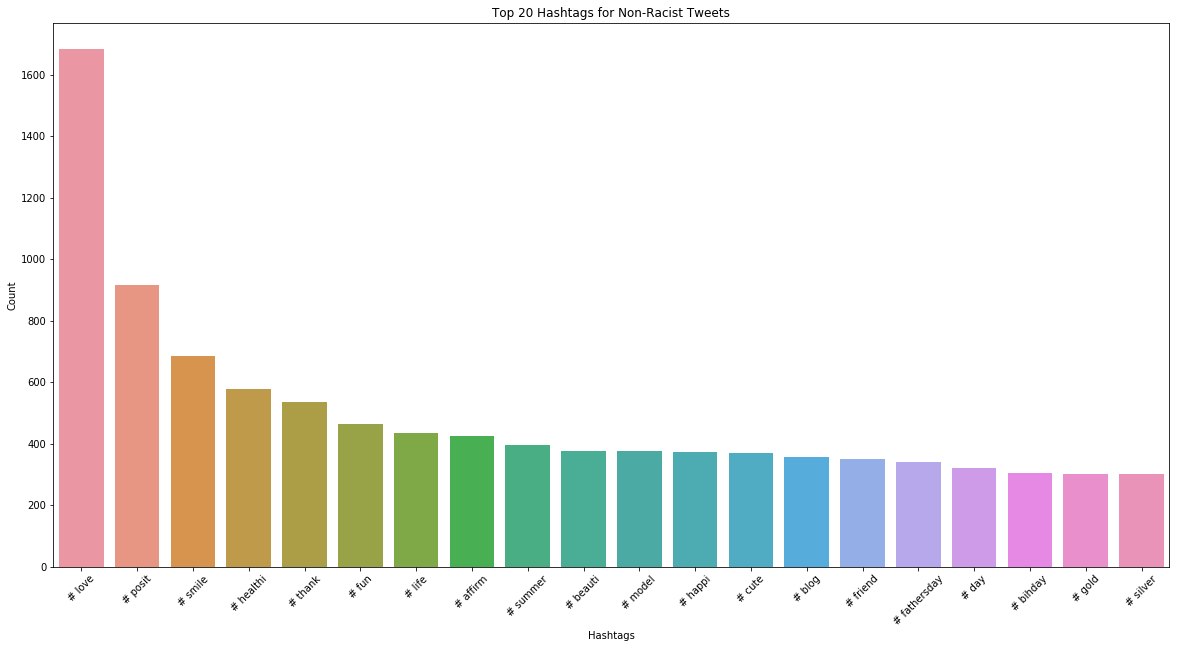

In [77]:
fig=plt.figure(figsize=(20,10))
sns.barplot(data=df_non_hate,x="Hashtags",y="Count")
plt.title("Top 20 Hashtags for Non-Racist Tweets")
plt.rc('font', size=14)
plt.xticks(rotation=45)
plt.show()

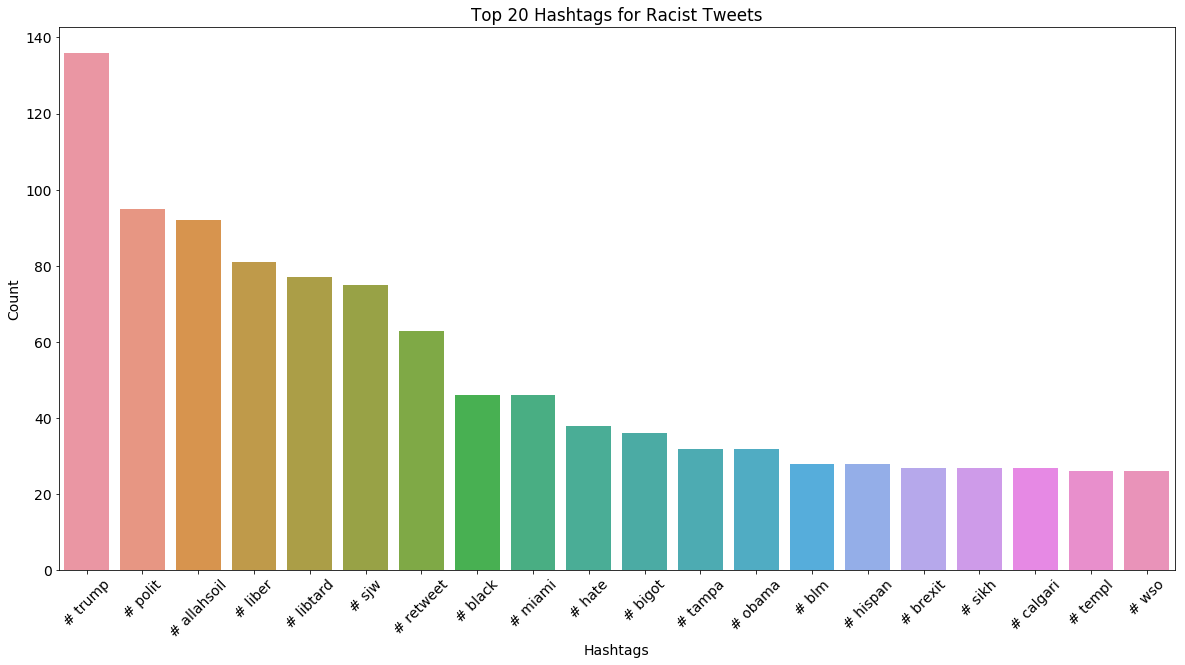

In [78]:
fig=plt.figure(figsize=(20,10))
sns.barplot(data=df_racist,x="Hashtags",y="Count")
plt.title("Top 20 Hashtags for Racist Tweets")
plt.rc('font', size=14)
plt.xticks(rotation=45)
plt.show()

##### Extracting Features using various approaches

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

#### Using Bag-of-Words Approach

In [80]:
bag_of_words=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words="english")
bag_words=bag_of_words.fit_transform(combi_data["cl_tweets"])

#### Using TF-IDF Approach

In [81]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi_data["cl_tweets"])
tfidf.shape

(31967, 1000)

#### Using Word2Vec Approach

In [82]:
tokenized_tweet = combi_data["cl_tweets"].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi_data["cl_tweets"]), epochs=20)

(4497382, 6491760)

In [83]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [84]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape 


(31967, 200)

In [85]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [86]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#### Building Model through Logistic Regression on Bag_Of_Words_Approach

In [88]:

train_bow = bag_words[:31962,:]
test_bow = bag_words[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_data['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

print("F1_Score " ,f1_score(yvalid, prediction_int)) # calculating f1 score
prediction_test=lreg.predict_proba(test_bow)
predicted_val=prediction_test[:,1]>=0.3
predicted_val=predicted_val.astype(np.int)
test_data['label']=predicted_val
test_data.head(10)

F1_Score  0.555921052631579


,id,tweet,label
0,31963,Hi It’s nice to see u,0
1,31964,Wow u are back,0
2,31965,"Bob is bullheaded sometimes, but he always gets the job done.",0
3,31966,I love my country but people are full of hatred,0
4,31967,A sharp tongue does not mean you have a keen mind,0


#### Building Model through Logistic Regression on TF-IDF Approach

In [89]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
print("F1 Score ",f1_score(yvalid, prediction_int))
prediction_test=lreg.predict_proba(test_bow)
predicted_val=prediction_test[:,1]>=0.3
predicted_val=predicted_val.astype(np.int)
test_data['label']=predicted_val
test_data.head(10)



F1 Score  0.5484716157205239


,id,tweet,label
0,31963,Hi It’s nice to see u,0
1,31964,Wow u are back,0
2,31965,"Bob is bullheaded sometimes, but he always gets the job done.",0
3,31966,I love my country but people are full of hatred,0
4,31967,A sharp tongue does not mean you have a keen mind,0


In [90]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
print("F1 Score ",f1_score(yvalid, prediction_int))
prediction_test=lreg.predict_proba(test_w2v)
predicted_val=prediction_test[:,1]>=0.3
predicted_val=predicted_val.astype(np.int)
test_data['label']=predicted_val
test_data.head(10)


F1 Score  0.5994020926756354


,id,tweet,label
0,31963,Hi It’s nice to see u,0
1,31964,Wow u are back,0
2,31965,"Bob is bullheaded sometimes, but he always gets the job done.",0
3,31966,I love my country but people are full of hatred,1
4,31967,A sharp tongue does not mean you have a keen mind,0


#### Building Model through XGBoost on Bag_Of_Words_Approach

In [91]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
print("F1 Score ",f1_score(yvalid, prediction))
prediction_test=xgb_model.predict(test_bow)
test_data['label']=prediction_test
test_data.head(10)

F1 Score  0.5129186602870813


,id,tweet,label
0,31963,Hi It’s nice to see u,0
1,31964,Wow u are back,0
2,31965,"Bob is bullheaded sometimes, but he always gets the job done.",0
3,31966,I love my country but people are full of hatred,0
4,31967,A sharp tongue does not mean you have a keen mind,0


In [92]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)
prediction = xgb.predict(xvalid_w2v)
print("F1 Score ",f1_score(yvalid, prediction))
prediction_test=xgb.predict(test_w2v)
test_data['label']=prediction_test
test_data.head(10)

F1 Score  0.6473779385171791


,id,tweet,label
0,31963,Hi It’s nice to see u,0
1,31964,Wow u are back,0
2,31965,"Bob is bullheaded sometimes, but he always gets the job done.",0
3,31966,I love my country but people are full of hatred,0
4,31967,A sharp tongue does not mean you have a keen mind,0
